In [6]:
# Just to know last time this was run:
import time
print(time.ctime())

Mon Oct 23 16:26:24 2023


# J Using sqlalchemy to access MySQL databases

## Have a look at the MySQL.pdf presentation.

This package sqlalchemy contains a pure-Python MySQL client library. In this sense, it does not need to have access to mysql reader or library, which is the case for the mysqldb package.

It is installed with "conda install sqlalchemy" or "pip install sqlalchemy"

We first import the usual libraries

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os

This is the import of the library used to connect to MySQl database

In [8]:
try:
    import sqlalchemy
except:
    !pip install SQLalchemy
    import sqlalchemy

First you need to connect to a database. In our example, we will use the 3MdB database, which needs a password. https://sites.google.com/site/mexicanmillionmodels/

### Using pandas library

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
from sqlalchemy import create_engine


host = '132.248.3.52' #'3mdb.astro.unam.mx'
port = 3306
user = 'OVN_user'
db = '3MdB_17'
user_password = os.environ['MdB_PASSWD'] # ask me for the password :-)

In [10]:
sqlEngine = create_engine(f'mysql+pymysql://{user}:{user_password}@{host}:{port}/{db}')

In [18]:
sel = """
SELECT log10(N__2_658345A/H__1_656281A) as n2, 
    log10(O__3_500684A/H__1_486133A) as o3, 
    OXYGEN as O 
FROM tab_17
WHERE ref = 'CB_19'
ORDER BY rand()
LIMIT 2000"""

with sqlEngine.connect() as db_con:
    res = pd.read_sql(sel, con=db_con)



In [17]:
print(len(res))

2000


In [19]:
res.describe()

,n2,o3,O
count,2000.000000,2000.000000,2000.000000
mean,-2.265886,-1.219635,-3.483844
std,1.541032,2.666577,1.023674
min,-7.556002,-16.969365,-6.246535
25%,-3.659344,-2.257201,-3.914195
50%,-2.067066,-0.238507,-3.308385
75%,-0.979468,0.704616,-2.720395
max,0.650952,1.541178,-1.959355


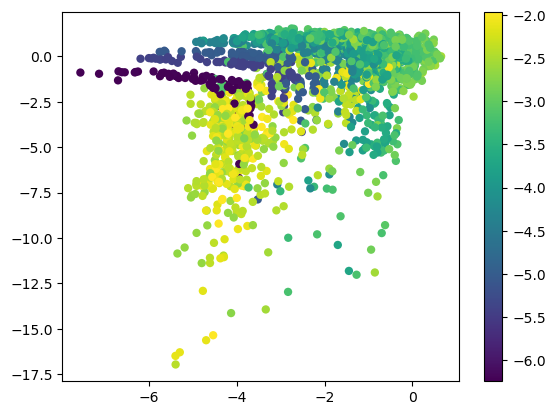

In [20]:
plt.scatter(res['n2'], res['o3'], c=res['O'], edgecolor='None')
plt.colorbar()

### More on databases, astronomy, SQL and python:

* AstroBetter: a very usefull blog, this post is on CDS and Python: https://www.astrobetter.com/blog/2020/07/06/the-cds-and-python-iv-simbad-the-yellow-pages-of-astronomical-sources/

* ADQL: Astronomy Data Query Language: 
 * IVOA reference document: https://www.ivoa.net/documents/ADQL/20180112/PR-ADQL-2.1-20180112.html
 * Man page on CDS: http://tapvizier.u-strasbg.fr/adql/help.html
 * ADQL cookbook on Gaia server: https://www.gaia.ac.uk/data/gaia-data-release-1/adql-cookbook


* Virtual Observatory : 
 * Cone search: http://voservices.net/spectrum/search_form_cone.aspx
 * SQL interface: http://voservices.net/spectrum/search_form_sql.aspx


* SciServer (needs an account): 
 * Main page: https://www.sciserver.org/
 * Dashboard: https://apps.sciserver.org/dashboard/
 * Introduction to CasJobs: https://skyserver.sdss.org/CasJobs/Guide.aspx
 * Example of Skyquery: http://www.voservices.net/skyquery/Assets/Query/Examples/00_index.aspx
 * Using Python : https://github.com/sciserver/SciScript-Python
 * Example using ython: https://github.com/sciserver/SciScript-Python/blob/master/Examples/Examples_SciScript-Python.ipynb


* An enhanced command line SQL interpreter client for astronomical surveys: https://github.com/mgckind/easyaccess